In [1]:
#load data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Self analysis

We start our investigation by analyzing the extracting the comparison of the same speaker.

count    285.000000
mean       0.991094
std        0.004035
min        0.970732
25%        0.989072
50%        0.991943
75%        0.993985
max        0.998221
Name: Cosine_Similarity, dtype: float64


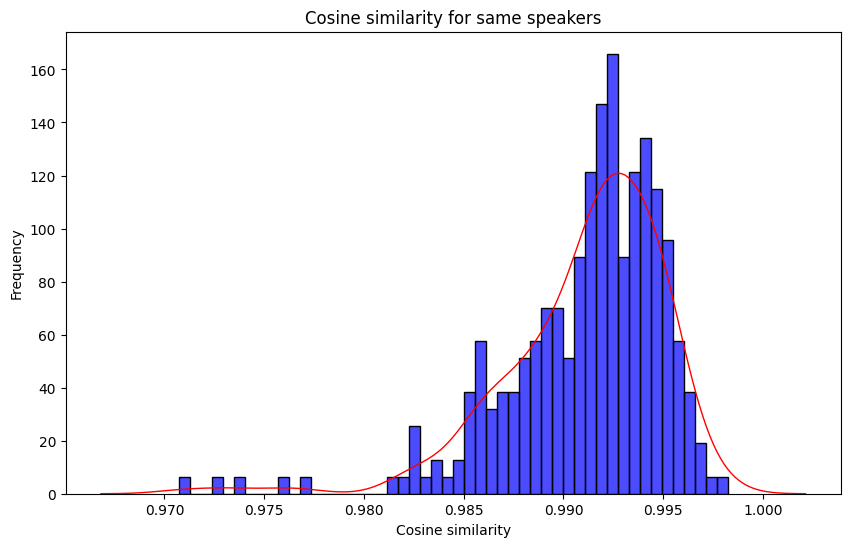

Mode of the distribution: 0.9914180040359496


In [2]:
# load data
df_summary = pd.read_csv(os.path.join(
    'data',
    'results',
    'similarity_results_summary_processed.csv'))

# get same speakers comparison
df_same_speakers = df_summary[
    (df_summary['1_speaker'] == df_summary['2_speaker']) & 
    (df_summary['1_gender'] == df_summary['2_gender'])
]

# get description
print(df_same_speakers['Cosine_Similarity'].describe())

# plot
plt.figure(figsize=(10, 6))

sns.histplot(df_same_speakers['Cosine_Similarity'], bins=50, alpha=0.7, color='blue', stat='density')
sns.kdeplot(df_same_speakers['Cosine_Similarity'], color='red', linewidth=1)

plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.title('Cosine similarity for same speakers')
plt.show()

same_speakers_range = (df_same_speakers['Cosine_Similarity'].min(), df_same_speakers['Cosine_Similarity'].max())

# mode
same_speakers_mode = df_same_speakers['Cosine_Similarity'].mode()[0]
print(f'Mode of the distribution: {same_speakers_mode}')


count    10440.000000
mean         0.826234
std          0.084119
min          0.405884
25%          0.781043
50%          0.841062
75%          0.888361
max          0.979828
Name: Cosine_Similarity, dtype: float64
count    9730.000000
mean        0.882221
std         0.062833
min         0.523470
25%         0.848549
50%         0.895222
75%         0.928927
max         0.989317
Name: Cosine_Similarity, dtype: float64


C:\Users\carme\AppData\Local\Temp\ipykernel_36960\235557306.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


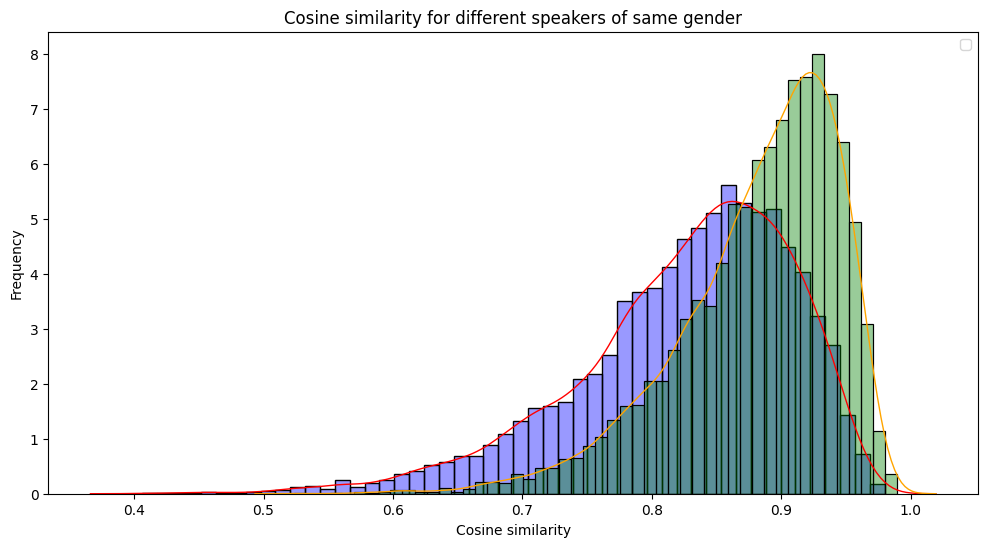

In [3]:
#  get comparison across different speakers
df_different_speakers = df_summary[~df_summary.index.isin(df_same_speakers.index)]


#select all 1_gender male and 2_gender male
df_males_self = df_different_speakers[(df_different_speakers['1_gender'] == 'male') & (df_different_speakers['2_gender'] == 'male')]
df_females_self = df_different_speakers[(df_different_speakers['1_gender'] == 'female') & (df_different_speakers['2_gender'] == 'female')]

# describe for males
print(df_males_self['Cosine_Similarity'].describe())

# describe for females
print(df_females_self['Cosine_Similarity'].describe())

# plot a histogram of cosine similarity superimpose male and femaple plots
plt.figure(figsize=(12, 6))

sns.histplot(df_males_self['Cosine_Similarity'], bins=50, alpha=0.4, color='blue', stat='density')
sns.kdeplot(df_males_self['Cosine_Similarity'], color='red', linewidth=1)

sns.histplot(df_females_self['Cosine_Similarity'], bins=50, alpha=0.4, color='green', stat='density')
sns.kdeplot(df_females_self['Cosine_Similarity'], color='orange', linewidth=1)

plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.title('Cosine similarity for different speakers of same gender')
plt.legend()
plt.show()

different_speakers_male_range = (df_males_self['Cosine_Similarity'].min(), df_males_self['Cosine_Similarity'].max())
different_speakers_female_range = (df_females_self['Cosine_Similarity'].min(), df_females_self['Cosine_Similarity'].max())

count    20300.000000
mean         0.691336
std          0.107674
min          0.300067
25%          0.614692
50%          0.697979
75%          0.773277
max          0.959360
Name: Cosine_Similarity, dtype: float64


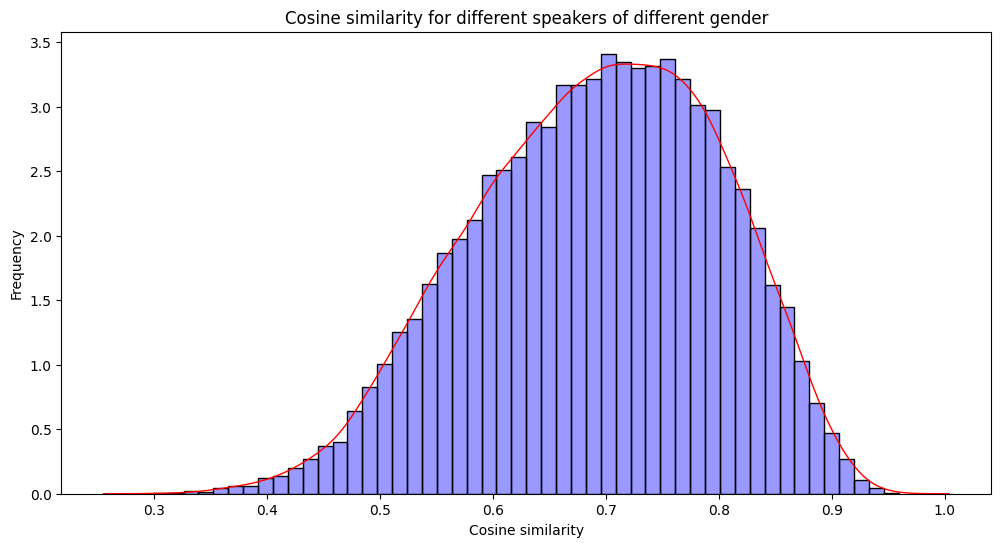

In [4]:
df_males_cross = df_different_speakers[
    (df_different_speakers['1_gender'] == 'male') & (df_different_speakers['2_gender'] == 'female') | 
    (df_different_speakers['1_gender'] == 'female') & (df_different_speakers['2_gender'] == 'male')
]

print(df_males_cross['Cosine_Similarity'].describe())


plt.figure(figsize=(12, 6))

sns.histplot(df_males_cross['Cosine_Similarity'], bins=50, alpha=0.4, color='blue', stat='density')
sns.kdeplot(df_males_cross['Cosine_Similarity'], color='red', linewidth=1)

plt.xlabel('Cosine similarity')
plt.ylabel('Frequency')
plt.title('Cosine similarity for different speakers of different gender')
plt.show()

different_gender_range = (df_males_cross['Cosine_Similarity'].min(), df_males_cross['Cosine_Similarity'].max())

(np.float64(0.9707322120666504), np.float64(0.9982211589813232))
(np.float64(0.4058836102485657), np.float64(0.9798275232315063))
(np.float64(0.5234702229499817), np.float64(0.9893170595169068))
(np.float64(0.3000668287277221), np.float64(0.9593603014945984))


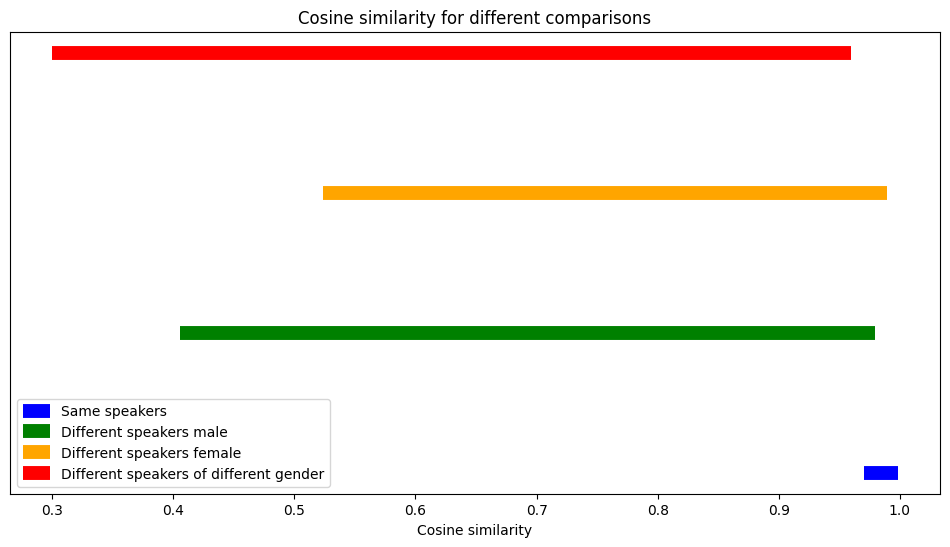

In [5]:
print(same_speakers_range)
print(different_speakers_male_range)
print(different_speakers_female_range)
print(different_gender_range)

same_gender_range = (df_same_speakers['Cosine_Similarity'].min(), df_same_speakers['Cosine_Similarity'].max())

# plot these ranges as horizontal bars

plt.figure(figsize=(12, 6))

plt.hlines(1, same_speakers_range[0], same_speakers_range[1], color='blue', label='Same speakers', linewidth=10)
plt.hlines(2, different_speakers_male_range[0], different_speakers_male_range[1], color='green', label='Different speakers male', linewidth=10)
plt.hlines(3, different_speakers_female_range[0], different_speakers_female_range[1], color='orange', label='Different speakers female', linewidth=10)
plt.hlines(4, different_gender_range[0], different_gender_range[1], color='red', label='Different speakers of different gender', linewidth=10)

plt.yticks([])
plt.xlabel('Cosine similarity')
plt.title('Cosine similarity for different comparisons')
plt.legend(loc='lower left')
plt.show()


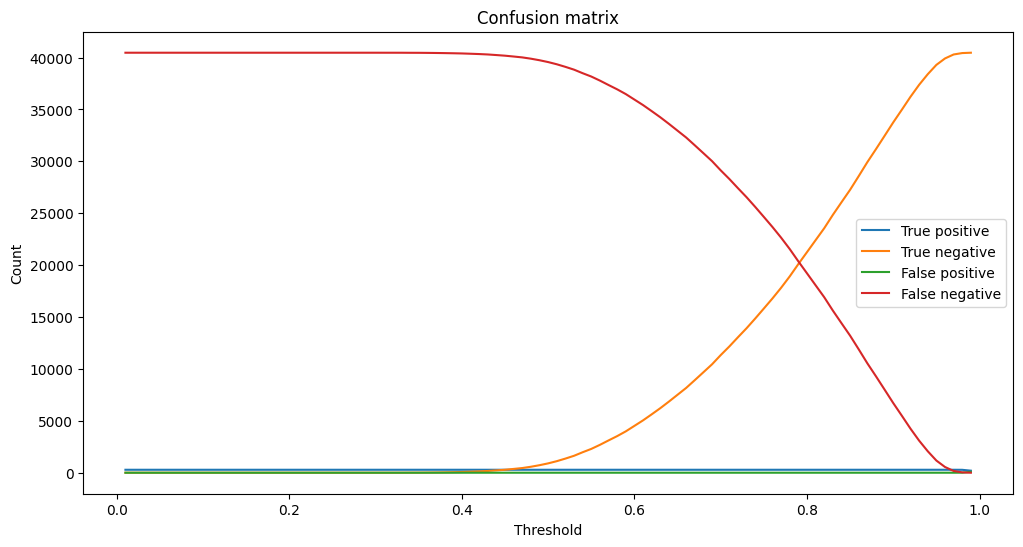

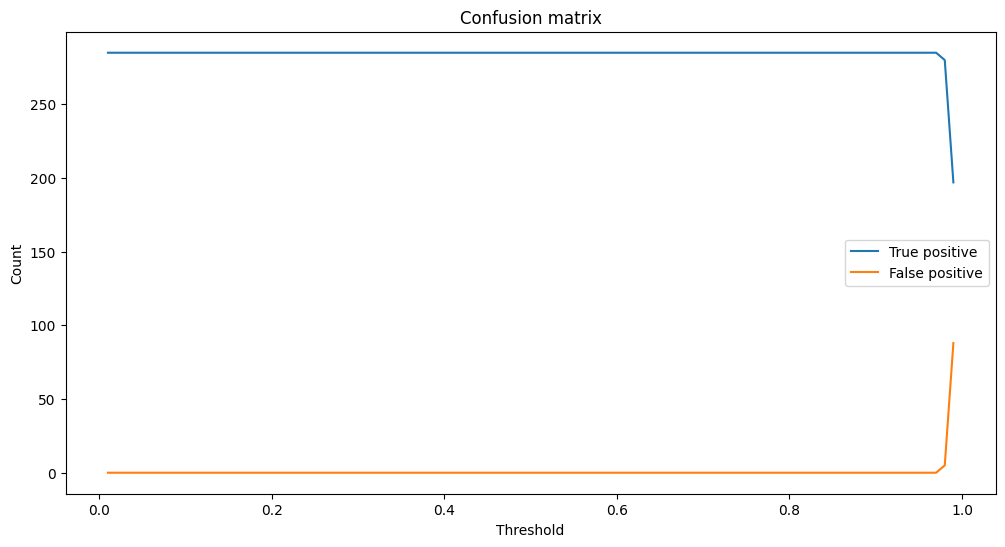

In [6]:

def calculate_metrics(threshold):
    df_summary['same_speaker_calculated'] = df_summary['Cosine_Similarity'] > threshold

    actual_same_speaker = (
        df_summary['1_speaker'] == df_summary['2_speaker']
    ) & (
        df_summary['1_gender'] == df_summary['2_gender']
    )

    predicted_same_speaker = df_summary['same_speaker_calculated']

    true_positive_count = len(df_summary[actual_same_speaker & predicted_same_speaker])
    true_negative_count = len(df_summary[~actual_same_speaker & ~predicted_same_speaker])
    false_positive_count = len(df_summary[actual_same_speaker & ~predicted_same_speaker])
    false_negative_count = len(df_summary[~actual_same_speaker & predicted_same_speaker])

    return true_positive_count, true_negative_count, false_positive_count, false_negative_count



thresholds = np.arange(0.01, 1, 0.01)
true_positives = []
true_negatives = []
false_positives = []
false_negatives = []


for threshold in thresholds:
    tp, tn, fp, fn = calculate_metrics(threshold)
    true_positives.append(tp)
    true_negatives.append(tn)
    false_positives.append(fp)
    false_negatives.append(fn)
    
    
# plot the results
plt.figure(figsize=(12, 6))

plt.plot(thresholds, true_positives, label='True positive')
plt.plot(thresholds, true_negatives, label='True negative')
plt.plot(thresholds, false_positives, label='False positive')
plt.plot(thresholds, false_negatives, label='False negative')

plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('Confusion matrix')
plt.legend()
plt.show()

# plot only tp and fp
plt.figure(figsize=(12, 6))

plt.plot(thresholds, true_positives, label='True positive')
plt.plot(thresholds, false_positives, label='False positive')

plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('Confusion matrix')
plt.legend()
plt.show()



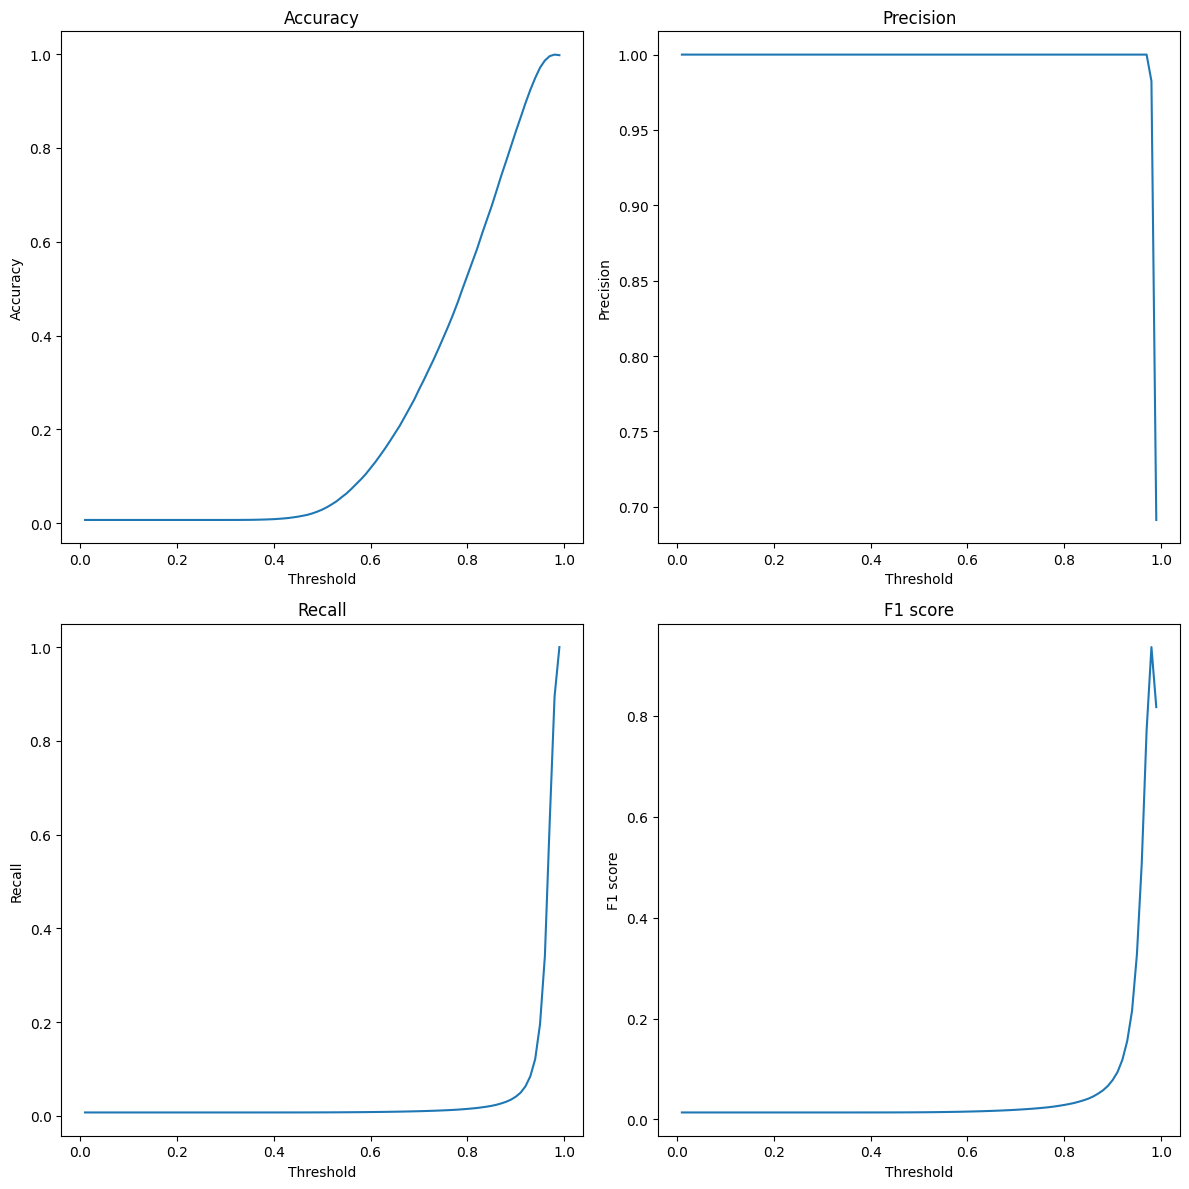

Maximum F1 score: 0.9364548494983277 at threshold 0.98


In [7]:
accuracies = []
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    tp, tn, fp, fn = calculate_metrics(threshold)
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    
# plot in different  subplots
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(thresholds, precisions)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision')

plt.subplot(2, 2, 3)
plt.plot(thresholds, recalls)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall')

plt.subplot(2, 2, 4)
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score')

plt.tight_layout()
plt.show()



# maximum F1 score
max_f1_index = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_index]

print(f"Maximum F1 score: {f1_scores[max_f1_index]} at threshold {max_f1_threshold}")


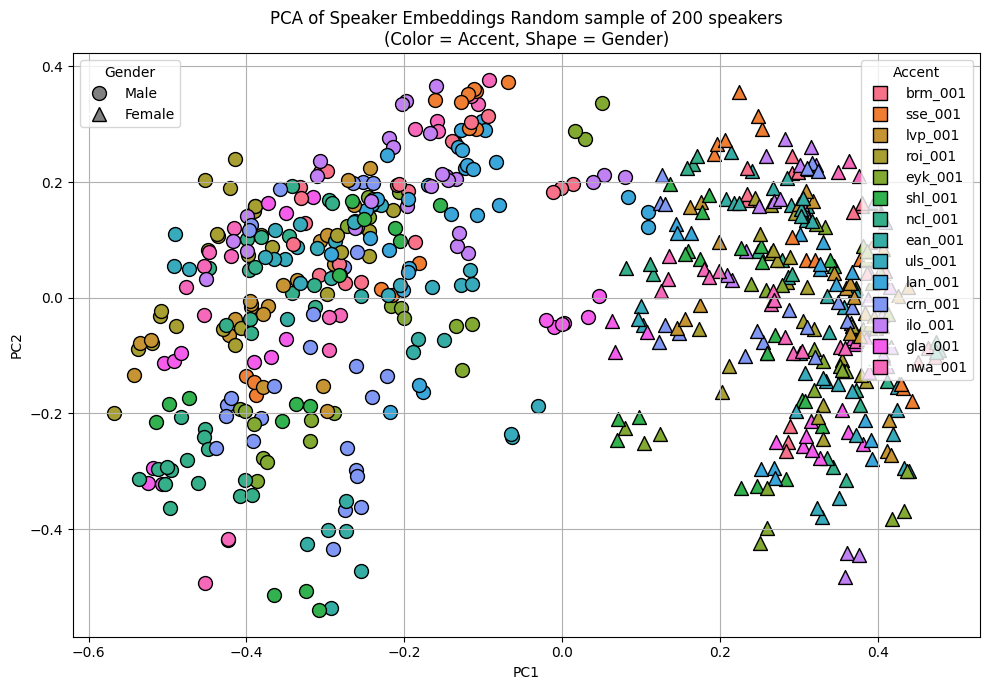

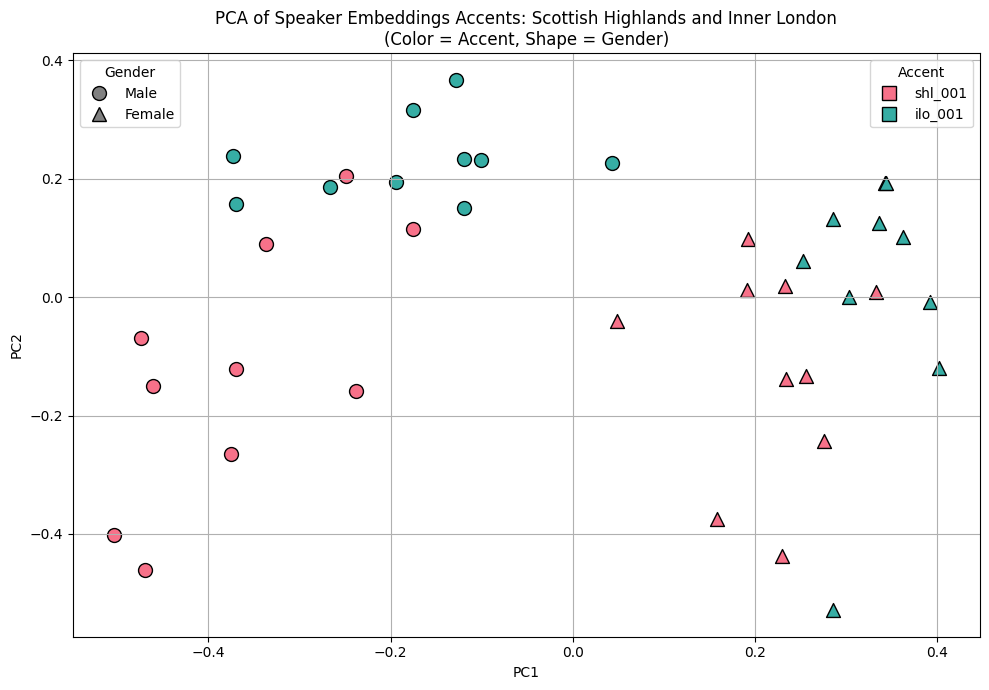

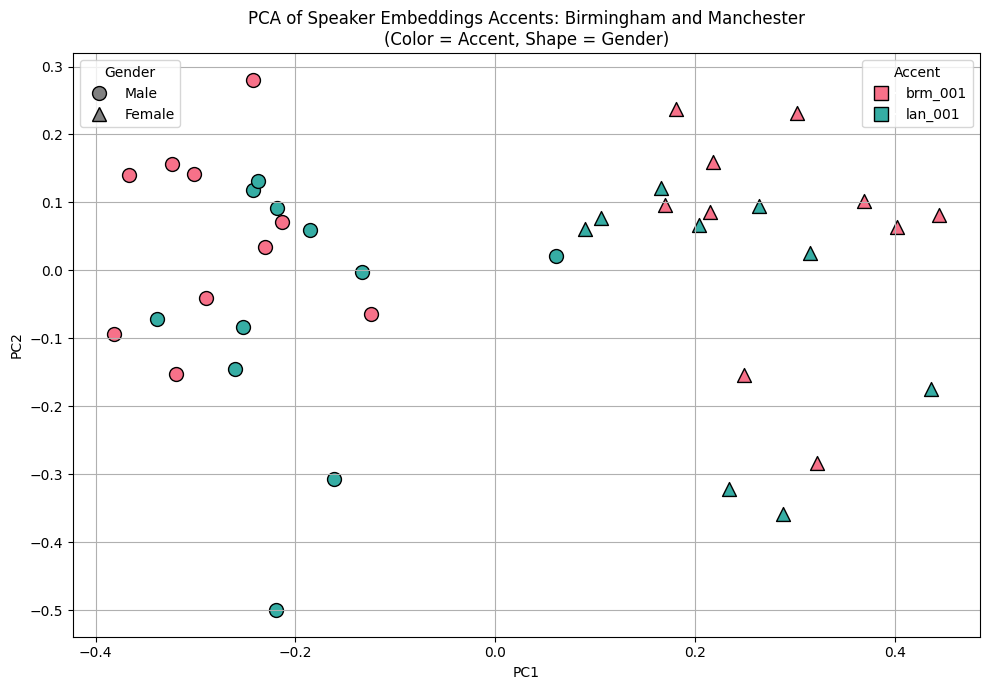

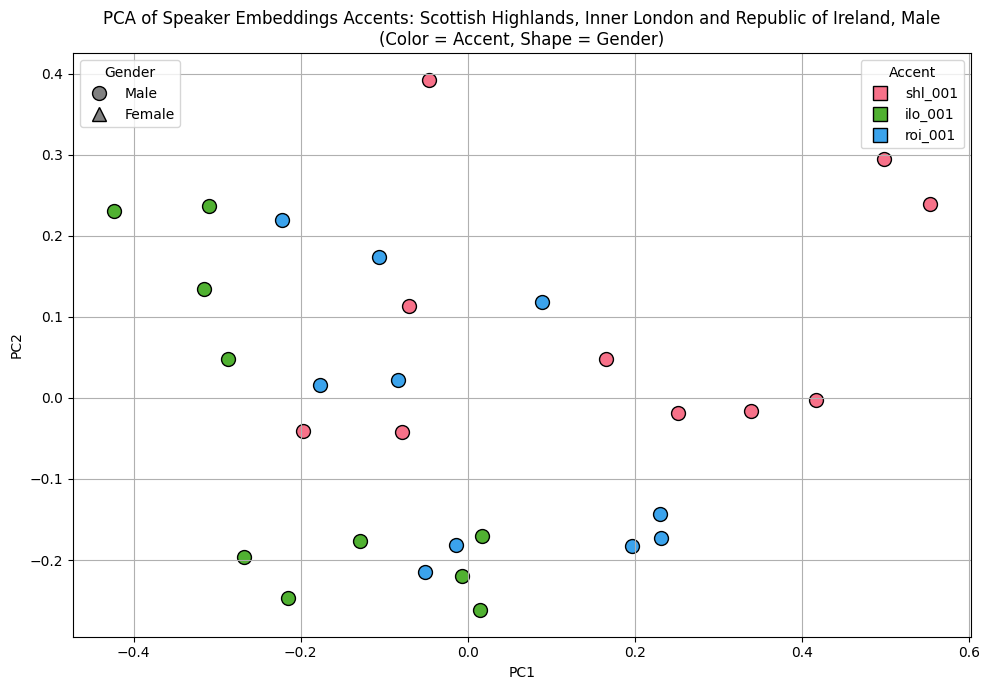

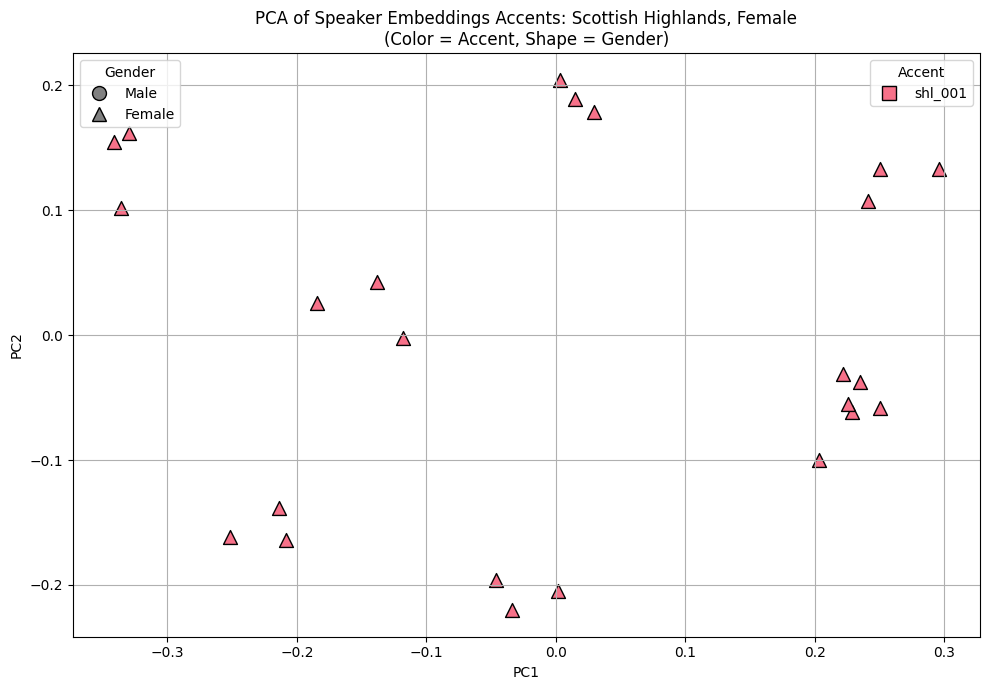

In [109]:
import torch
import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns


def embeddings_cluster_analysis_same_speakers(df):
    ''' takes a dataframe with embeddings for speakers and returns a dataframe with PCA results for all their embeddings '''

    resulting_dataframe = pd.DataFrame(columns=['speaker', 'accent', 'gender', 'marker', 'selected_embedding', 'PC1', 'PC2'])


    count = 0

    for i in range(len(df)):
        speaker = df.iloc[i]["Speaker"]
        accent = speaker.split("-")[0]
        gender = speaker.split("-")[1]

        speaker_embeddings = df.iloc[i]["Embedding"]

        
        for embedding_index in range(3):
        
            selected_embedding = speaker_embeddings[embedding_index]


            resulting_dataframe.loc[count] = {
                'speaker': speaker,
                'accent': accent,
                'gender': gender,
                'selected_embedding': selected_embedding,
                'PC1': None,
                'PC2': None
            }
            count += 1

    embedding_matrix = np.vstack(resulting_dataframe["selected_embedding"])

    # pca
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embedding_matrix)
    resulting_dataframe["PC1"] = pca_result[:, 0]
    resulting_dataframe["PC2"] = pca_result[:, 1]


    return resulting_dataframe




def embeddings_cluster_analysis(df):
    ''' takes a dataframe with embeddings for speakers  and returns a dataframe with PCA results for all their second embeddings '''

    resulting_dataframe = pd.DataFrame(columns=['speaker', 'accent', 'gender', 'selected_embedding', 'PC1', 'PC2'])


    for i in range(len(df)):
        speaker = df.iloc[i]["Speaker"]
        accent = speaker.split("-")[0]
        gender = speaker.split("-")[1]
        
        speaker_embeddings = df.iloc[i]["Embedding"]
        selected_index = 2
        selected_embedding = speaker_embeddings[selected_index]


        resulting_dataframe.loc[i] = {
            'speaker': speaker,
            'accent': accent,
            'gender': gender,
            'selected_embedding': selected_embedding,
            'PC1': None,
            'PC2': None
        }

    embedding_matrix = np.vstack(resulting_dataframe["selected_embedding"])

    # pca
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(embedding_matrix)
    resulting_dataframe["PC1"] = pca_result[:, 0]
    resulting_dataframe["PC2"] = pca_result[:, 1]
    
    return resulting_dataframe


def plot_embedding_clusters(resulting_dataframe, desc = ""):
    ''' plots the PCA results for the embeddings in the dataframe '''
    
    #plot
    # markers for gender
    gender_markers = {
        "male": "o",
        "female": "^"
    }

    # colour for accents
    unique_accents = resulting_dataframe["accent"].unique()
    palette = sns.color_palette("husl", len(unique_accents))
    accent_color_map = dict(zip(unique_accents, palette))


    plt.figure(figsize=(10, 7))

    for _, row in resulting_dataframe.iterrows():
        gender = row["gender"]
        accent = row["accent"]
        marker = gender_markers.get(gender, 'x')
        color = accent_color_map.get(accent, 'black')

        plt.scatter(row["PC1"], row["PC2"], marker=marker, color=color, edgecolor='k', s=100)

    gender_handles = [
        Line2D([0], [0], marker='o', color='w', label='Male',
            markerfacecolor='gray', markeredgecolor='k', markersize=10),
        Line2D([0], [0], marker='^', color='w', label='Female',
            markerfacecolor='gray', markeredgecolor='k', markersize=10)
    ]
    gender_legend = plt.legend(handles=gender_handles, title="Gender", loc='upper left')

    plt.gca().add_artist(gender_legend)

    accent_handles = [
        Line2D([0], [0], marker='s', color='w', label=accent,
            markerfacecolor=color, markeredgecolor='k', markersize=10)
        for accent, color in accent_color_map.items()
    ]
    plt.legend(handles=accent_handles, title="Accent", loc='upper right')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(f"PCA of Speaker Embeddings {desc}\n(Color = Accent, Shape = Gender)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()




def prepare_compare_accents_gender(accent_list, gender, df):
    ''' samples 10 speakers for each accent in the list, having the same gender '''

    accent_sample = []

    for accent in accent_list:
        accent_sample.append(df[df['Speaker'].str.contains(accent) & df['Speaker'].str.contains(f"-{gender}-")].sample(n=10, random_state=42).copy())

    df_accents= pd.concat(accent_sample, ignore_index=True)

    return df_accents


def prepare_compare_accents(accent_list, df):
    ''' samples 20 speakers for each accent in the list '''

    accent_sample = []

    for accent in accent_list:
        accent_sample.append(df[df['Speaker'].str.contains(accent)].sample(n=20, random_state=42).copy())

    return pd.concat(accent_sample, ignore_index=True)


def prepare_compare_speakers(accent, gender, df):
    '''samples 8 speakers from the provided accent and provided gender'''

    accent_sample = []
    
    accent_sample.append(df[df['Speaker'].str.contains(accent) & df['Speaker'].str.contains(f"-{gender}-")].sample(n=8, random_state=42).copy())

    return pd.concat(accent_sample, ignore_index=True)


# Load embeddings
df_speakers_embeddings = pd.read_pickle(os.path.join(
    'data',
    'embeddings',
    'embeddings.pkl'))


# Cluster experimant 1 : random sample of 200 speakers
df1 = df_speakers_embeddings.sample(n=200, random_state=42).copy()
result_1 = embeddings_cluster_analysis_same_speakers(df1)
plot_embedding_clusters(result_1, "Random sample of 200 speakers")


# Cluster experiment 2 : Scottish Highlands and Inner London accents, 20 speakers
df2 = prepare_compare_accents(["shl", "ilo"], df_speakers_embeddings)
result_2 = embeddings_cluster_analysis(df2)
plot_embedding_clusters(result_2, "Accents: Scottish Highlands and Inner London")


# Cluster experiment 3 : Birmingham and Manchester accents, 20 speakers
df3 = prepare_compare_accents(["brm", "lan"], df_speakers_embeddings)
result_3 = embeddings_cluster_analysis(df3)
plot_embedding_clusters(result_3, "Accents: Birmingham and Manchester")


# Cluster experiment 4 : Scottish Highlands, Inner London and Republic of Ireland accents, 20 speakers
df4 = prepare_compare_accents_gender(["shl", "ilo", "roi"], "male", df_speakers_embeddings)
result_4 = embeddings_cluster_analysis(df4)
plot_embedding_clusters(result_4, "Accents: Scottish Highlands, Inner London and Republic of Ireland, Male")



# Cluster experiment 5 : Scottish Highlands, Female speakers, 5 speakers
df5 = prepare_compare_speakers("shl", "female", df_speakers_embeddings)
result_5 = embeddings_cluster_analysis_same_speakers(df5)
plot_embedding_clusters(result_5, "Accents: Scottish Highlands, Female")



In [ ]:
# IMPORTANT
# -----------------------------------------------
# most of this function is copied from Dr. Kostas's tutorial
# -----------------------------------------------
             
def plot_surface(clf, X, y, xlim=(-1, 1), ylim=(-1, 1), n_steps=250, show=True):
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict class for each grid point
    Z = clf.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.tab10)  # Better colormap for multi-class
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.tab10, edgecolor='k')
    
    # # Create a colorbar with labels
    # classes = np.unique(y)
    # cbar = plt.colorbar(scatter, ticks=range(len(classes)))
    # cbar.ax.set_yticklabels(classes)  # show class labels if numeric
    
    plt.xlim(xlim)
    plt.ylim(ylim)
    if show:
        plt.show()


f:\work\masters-ai\ari5121-project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


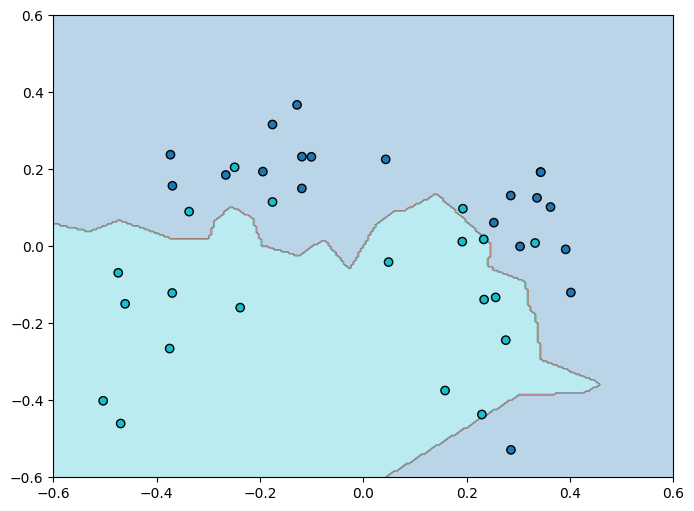

Training error = 12.5%


f:\work\masters-ai\ari5121-project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


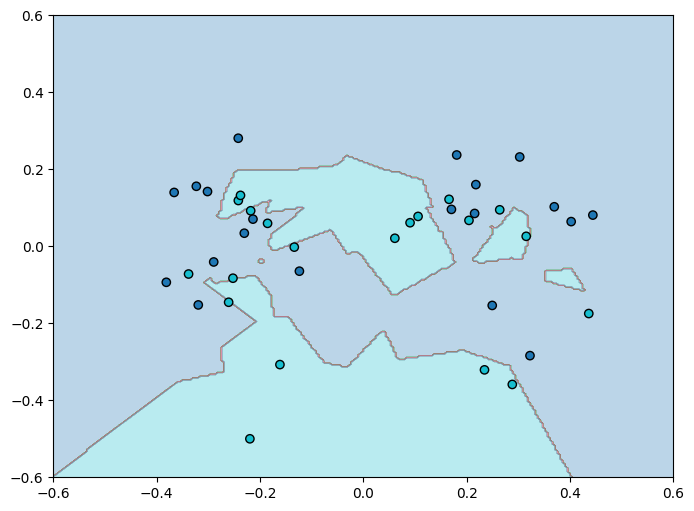

Training error = 25.0%


f:\work\masters-ai\ari5121-project\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


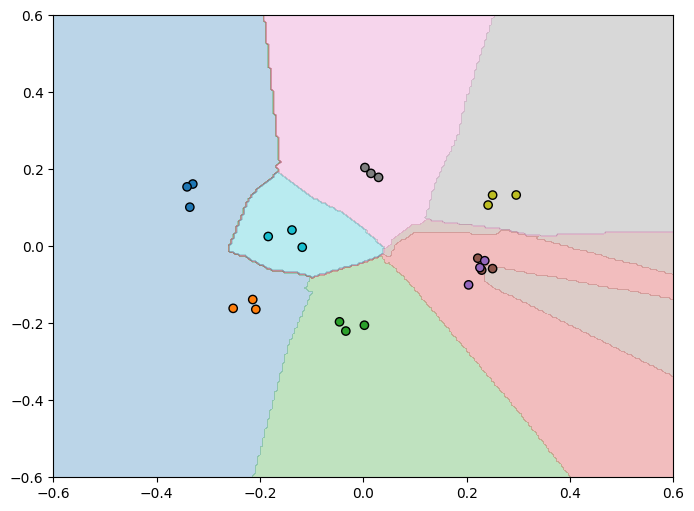

Training error = 8.3%


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


def classifier_fit(X, y, neighbors=2):

    clf = KNeighborsClassifier(n_neighbors=neighbors)
    y_encoded = le.fit_transform(y)  # e.g. shl_001 -> 0, ilo_001 -> 1

    clf.fit(X, y_encoded)
    plot_surface(clf, X, y_encoded, xlim=(-0.6, 0.6), ylim=(-0.6, 0.6))

    y_encoded = le.transform(y)  # Encode y_1 using same label encoder

    print("Training error = {:.1f}%".format(100 * zero_one_loss(y_encoded, clf.predict(X))))



y_2 = result_2['accent']
X_2 = result_2[['PC1', 'PC2']]
classifier_fit(X_2, y_2)

X_3 = result_3[['PC1', 'PC2']]
y_3 = result_3['accent']
classifier_fit(X_3, y_3)

# X_4 = result_4[['PC1', 'PC2']]
# y_4 = result_4['accent']
# classifier_fit(X_4, y_4)

X_5 = result_5[['PC1', 'PC2']]
y_5 = result_5['speaker']
classifier_fit(X_5, y_5, neighbors=2)
